# Industry 4.0 의 중심, AI - ML&DL

<div align='right'><font size=2 color='gray'>Machine Learning & Deep Learning with TensorFlow @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

# Sect10. NN, ReLu, Xavier, Dropout, and Adam

### 7. MNIST and High-level TF API

In [1]:
from images import bigpycraft_copy as bpc
import time, os

In [2]:
# MNIST and High-level TF API
from tensorflow.contrib.layers import fully_connected, batch_norm, dropout
from tensorflow.contrib.framework import arg_scope
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.01  # we can use large learning rate using Batch Normalization
training_epochs = 15
batch_size = 100
keep_prob = 0.7

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
train_mode = tf.placeholder(tf.bool, name='train_mode')

# layer output size
hidden_output_size = 512
final_output_size = 10

xavier_init = tf.contrib.layers.xavier_initializer()
bn_params = {
    'is_training': train_mode,
    'decay': 0.9,
    'updates_collections': None
}

Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# We can build short code using 'arg_scope' to avoid duplicate code
# same function with different arguments
with arg_scope([fully_connected],
               activation_fn=tf.nn.relu,
               weights_initializer=xavier_init,
               biases_initializer=None,
               normalizer_fn=batch_norm,
               normalizer_params=bn_params
               ):
    hidden_layer1 = fully_connected(X, hidden_output_size, scope="h1")
    h1_drop = dropout(hidden_layer1, keep_prob, is_training=train_mode)
    hidden_layer2 = fully_connected(h1_drop, hidden_output_size, scope="h2")
    h2_drop = dropout(hidden_layer1, keep_prob, is_training=train_mode)
    hidden_layer3 = fully_connected(h2_drop, hidden_output_size, scope="h3")
    h3_drop = dropout(hidden_layer1, keep_prob, is_training=train_mode)
    hidden_layer4 = fully_connected(h3_drop, hidden_output_size, scope="h4")
    h4_drop = dropout(hidden_layer1, keep_prob, is_training=train_mode)
    hypothesis = fully_connected(h4_drop, final_output_size, activation_fn=None, scope="hypothesis")


# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


In [4]:
# parameters
training_epochs = 15
batch_size = 100

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
time1 = time.time()
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict_train = {X: batch_xs, Y: batch_ys, train_mode: True}
        feed_dict_cost = {X: batch_xs, Y: batch_ys, train_mode: False}
        opt = sess.run(optimizer, feed_dict=feed_dict_train)
        c = sess.run(cost, feed_dict=feed_dict_cost)
        avg_cost += c / total_batch

    print("[Epoch: {:>4}] cost = {:>.9}".format(epoch + 1, avg_cost))
    #print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')
time2 = time.time()

# bpc.chk_processting_time(time1, time2)

[Epoch:    1] cost = 0.519404615
[Epoch:    2] cost = 0.434125689
[Epoch:    3] cost = 0.406163611
[Epoch:    4] cost = 0.392860126
[Epoch:    5] cost = 0.383472196
[Epoch:    6] cost = 0.377117963
[Epoch:    7] cost = 0.371871308
[Epoch:    8] cost = 0.368444791
[Epoch:    9] cost = 0.3648684
[Epoch:   10] cost = 0.361661422
[Epoch:   11] cost = 0.360059741
[Epoch:   12] cost = 0.357161337
[Epoch:   13] cost = 0.356725041
[Epoch:   14] cost = 0.352423691
[Epoch:   15] cost = 0.35079689
Learning Finished!
처리시간 : 2분 19초 경과되었습니다.


139.51647973060608

Accuracy: 0.9808
Label:  [4]
Prediction:  [4]


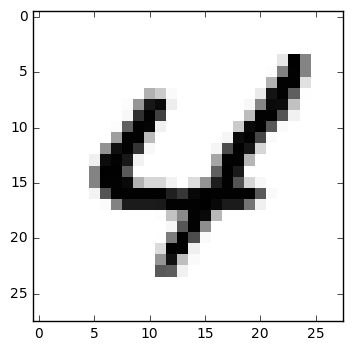

In [7]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, train_mode: False}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], train_mode: False}))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>